In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pathlib import Path
import matplotlib.gridspec as gridspec

In [ ]:
pathlist = Path("/Users/haobo2022/Documents/energy-model-black-box/energy usage data").glob('*.csv')
temp_path = ""
comb_data = pd.DataFrame()

for path in pathlist:
    raw_data = pd.read_csv(str(path))
    reindex_data = raw_data.reset_index()
    reindex_data.columns = "Account ID", "Service Address", "Day", "Consumption (kWh)", "Temperature(F)"
    data_clean = reindex_data.drop(0, axis = 0)
    data_final = data_clean[["Day", "Consumption (kWh)", "Temperature(F)"]]
    year = ' ' +  str(path)[-8:-4]
    data_final['Day'] = pd.to_datetime(data_final['Day'] + str(year), format='%b %d %Y')
    comb_data = pd.concat([comb_data, data_final], ignore_index=True)

In [6]:
data = comb_data.sort_values(by = "Day").reset_index(drop = True)

,Day,Consumption (kWh),Temperature(F)
0,2022-09-01,6.2112,60
1,2022-09-02,5.5536,58
2,2022-09-03,5.2968,61
3,2022-09-04,4.0368,61
4,2022-09-05,6.1584,59


In [19]:
## interpolation method

# Replace 0 values with NaN
data['Temperature(F)'].replace(0, pd.NA, inplace=True)

# Interpolate NaN values (linear interpolation by default)
data['Temperature(F)'] = data['Temperature(F)'].interpolate()

# Optionally, if the first or last value is NaN after interpolation, you can fill it:
# Fill any remaining NaN values with forward fill or backward fill
data['Temperature(F)'].fillna(method='ffill', inplace=True)  # or 'bfill'


# ### mean method
# # Calculate the mean temperature, excluding 0 values
# mean_temp = pd.to_numeric(data[data['Temperature(F)'] != 0]['Temperature(F)']).mean()

# # Replace 0 values with the mean temperature
# data['Temperature(F)'].replace(0, mean_temp, inplace=True)

/var/folders/pp/g7kx8d4j3blghd0n4hn3q0880000gn/T/ipykernel_98171/3659286786.py:7: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data['Temperature(F)'] = data['Temperature(F)'].interpolate()
/var/folders/pp/g7kx8d4j3blghd0n4hn3q0880000gn/T/ipykernel_98171/3659286786.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Temperature(F)'].fillna(method='ffill', inplace=True)  # or 'bfill'


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

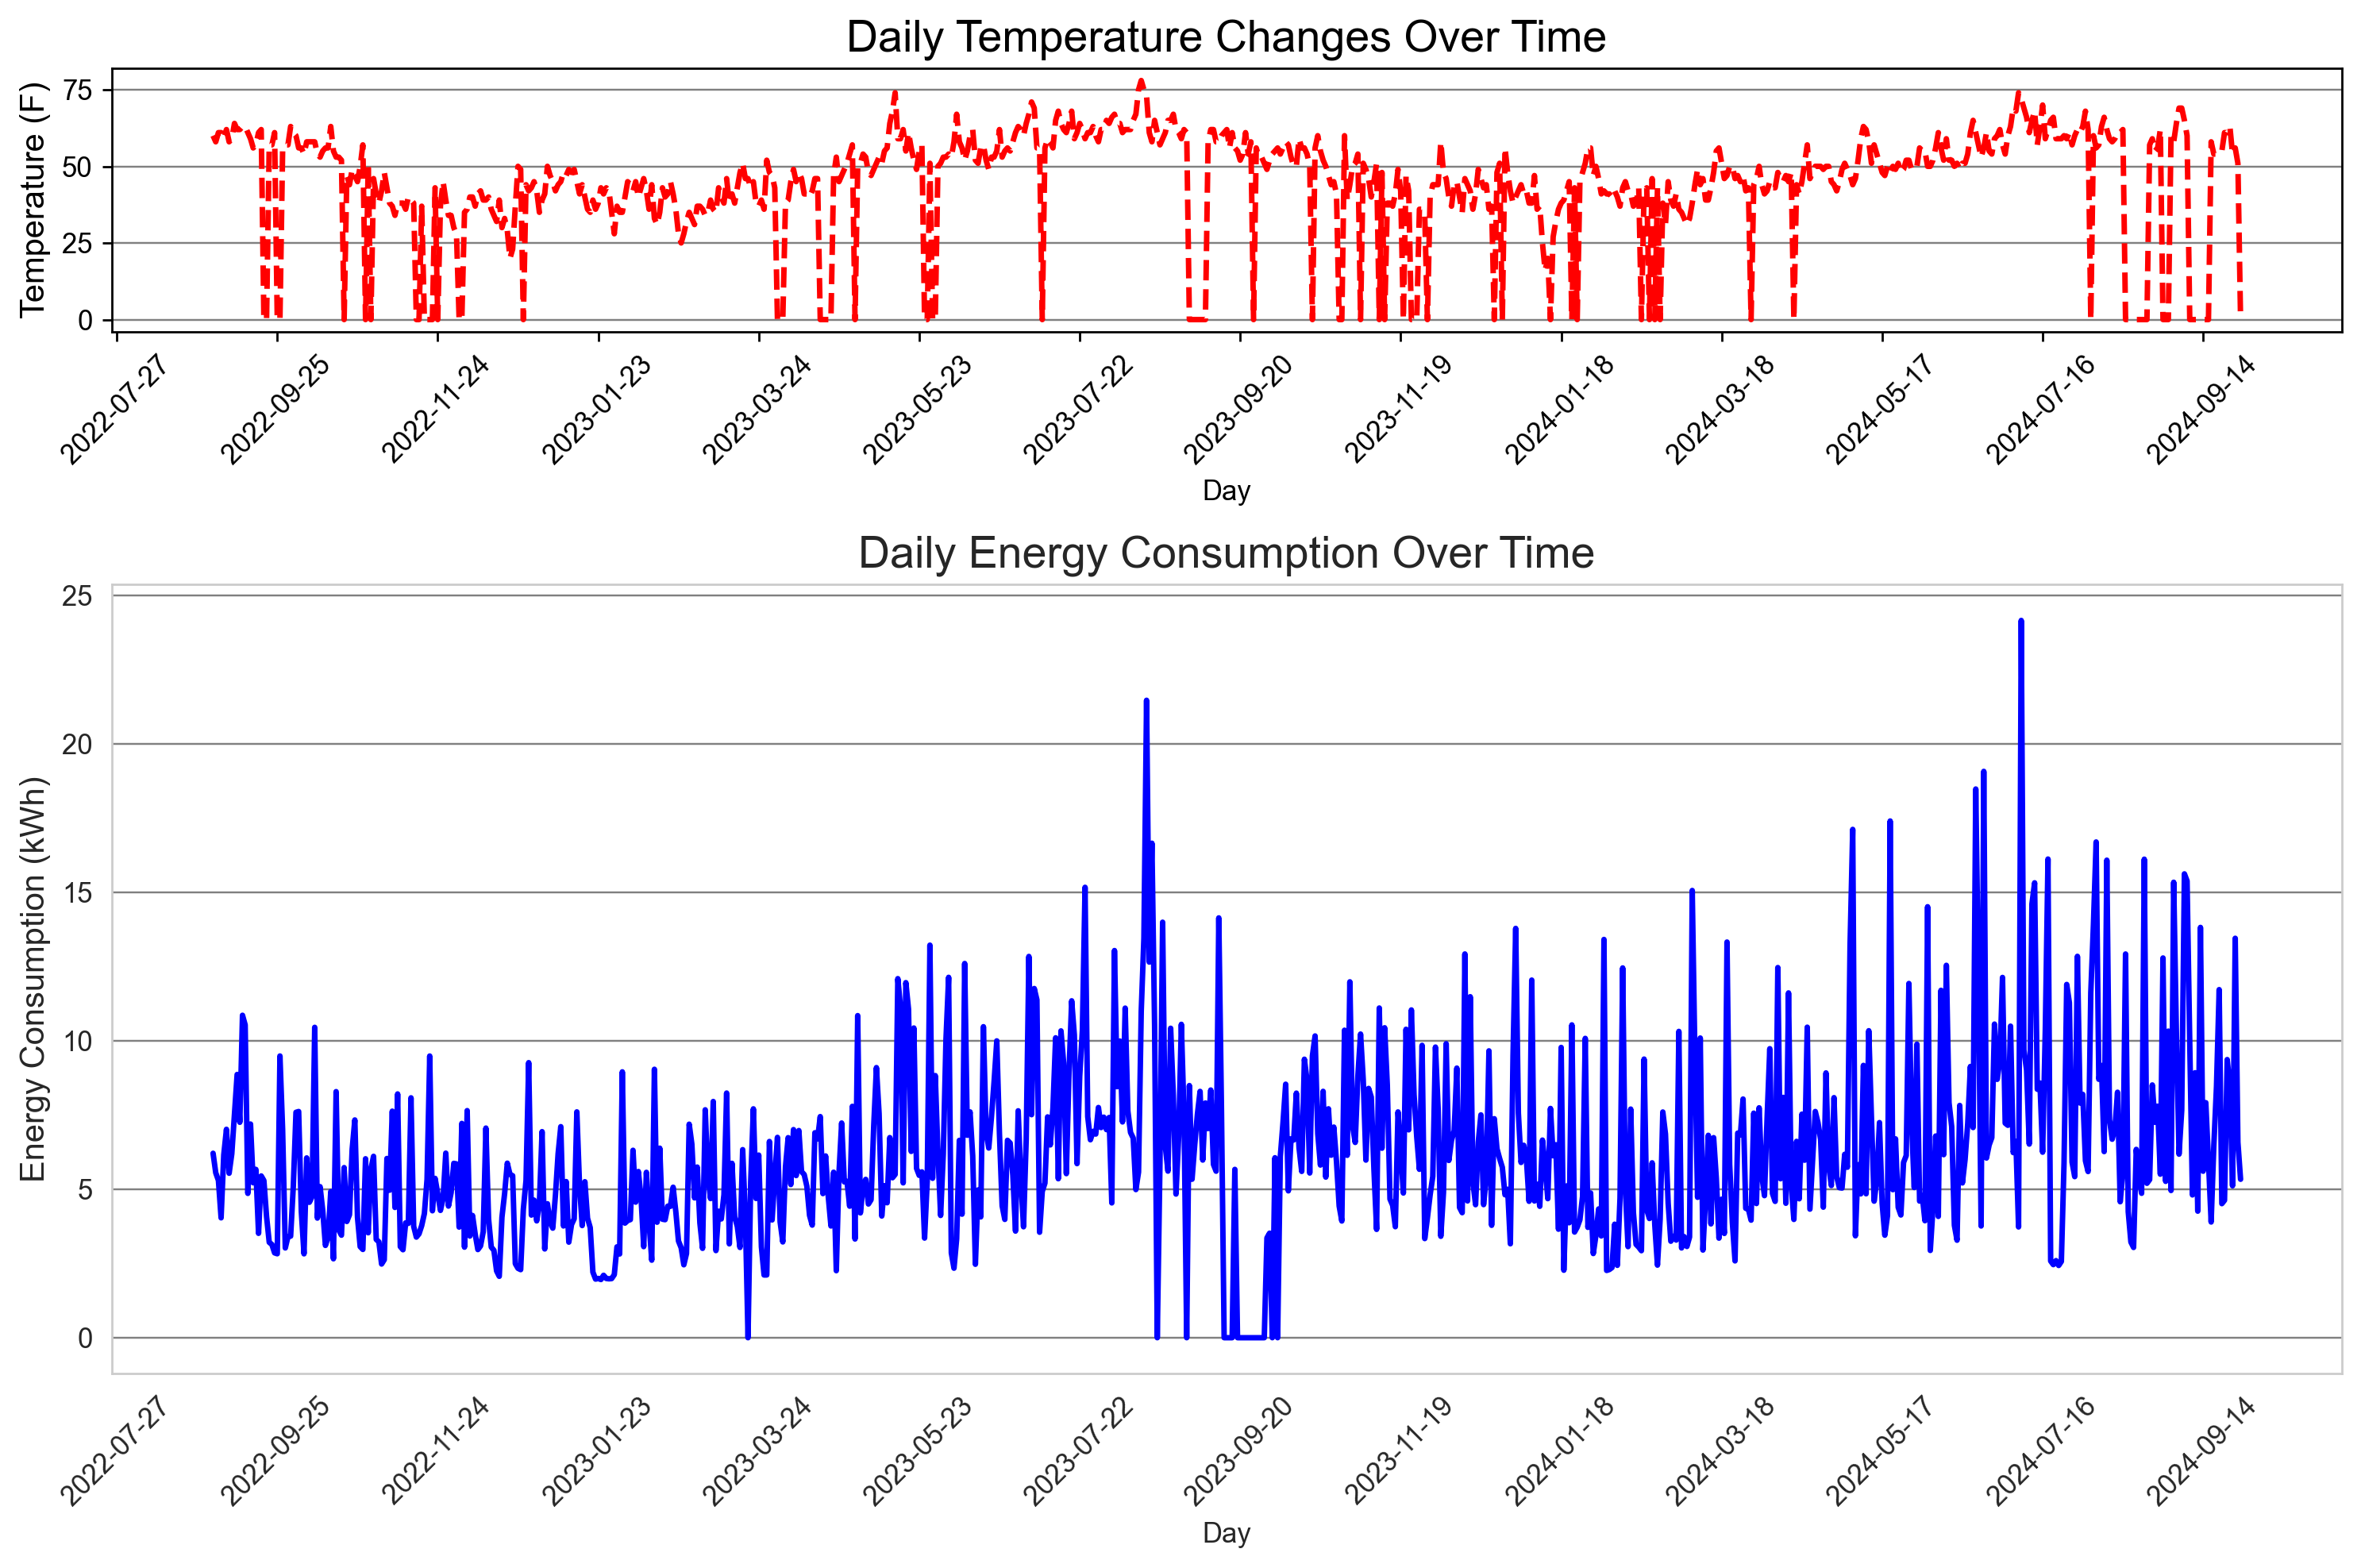

In [21]:
# Convert 'Consumption (kWh)' and 'Temperature(F)' to numeric
data['Consumption (kWh)'] = pd.to_numeric(data['Consumption (kWh)'], errors='coerce')
data['Temperature(F)'] = pd.to_numeric(data['Temperature(F)'], errors='coerce')

# Set up a grid with different heights for the two subplots
fig = plt.figure(figsize=(12, 8), dpi = 250)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])  # Temperature plot shorter than energy plot

# First subplot (top): Temperature
ax1 = fig.add_subplot(gs[0])
sns.set_style("whitegrid")
sns.lineplot(x='Day', y='Temperature(F)', data=data, ax=ax1, color='red', linewidth=2, linestyle='--')
ax1.set_title('Daily Temperature Changes Over Time', fontsize=16)
ax1.set_ylabel('Temperature (F)', fontsize=12)

# Remove all vertical gridlines and keep only horizontal gridlines
ax1.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.7)
ax1.grid(False, which='major', axis='x')

# Adjust x-axis to show more date labels
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.get_xticklabels(), rotation=45)

# Second subplot (bottom): Energy Consumption
ax2 = fig.add_subplot(gs[1], sharex=ax1)  # Share the same x-axis as the first plot
sns.lineplot(x='Day', y='Consumption (kWh)', data=data, ax=ax2, color='blue', linewidth=2)
ax2.set_title('Daily Energy Consumption Over Time', fontsize=16)
ax2.set_ylabel('Energy Consumption (kWh)', fontsize=12)

# Adjust x-axis to show more date labels and avoid white space
ax2.xaxis.set_major_locator(plt.MaxNLocator(15))
ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.setp(ax2.get_xticklabels(), rotation=45)

# Remove vertical gridlines and keep only horizontal gridlines
ax2.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.7)
ax2.grid(False, which='major', axis='x')

# Adjust layout to ensure no overlap between the subplots
plt.tight_layout()

# Show theplot
plt.show()

In [31]:
# exploring data correlation
correlation = data[['Consumption (kWh)', 'Temperature(F)']].corr()
print(correlation)

                   Consumption (kWh)  Temperature(F)
Consumption (kWh)           1.000000        0.144201
Temperature(F)              0.144201        1.000000


In [33]:
data['DayOfWeek'] = data['Day'].dt.dayofweek  # Monday=0, Sunday=6
data['Month'] = data['Day'].dt.month
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: True if x >= 5 else False)

In [35]:
data.head()

,Day,Consumption (kWh),Temperature(F),DayOfWeek,Month,IsWeekend
0,2022-09-01,6.2112,60,3,9,False
1,2022-09-02,5.5536,58,4,9,False
2,2022-09-03,5.2968,61,5,9,True
3,2022-09-04,4.0368,61,6,9,True
4,2022-09-05,6.1584,59,0,9,False


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data[['Temperature(F)', 'DayOfWeek', 'Month', 'IsWeekend']]  # Add other features as needed
y = data['Consumption (kWh)']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 20.63282217335447
R-squared: -0.27707334653418436


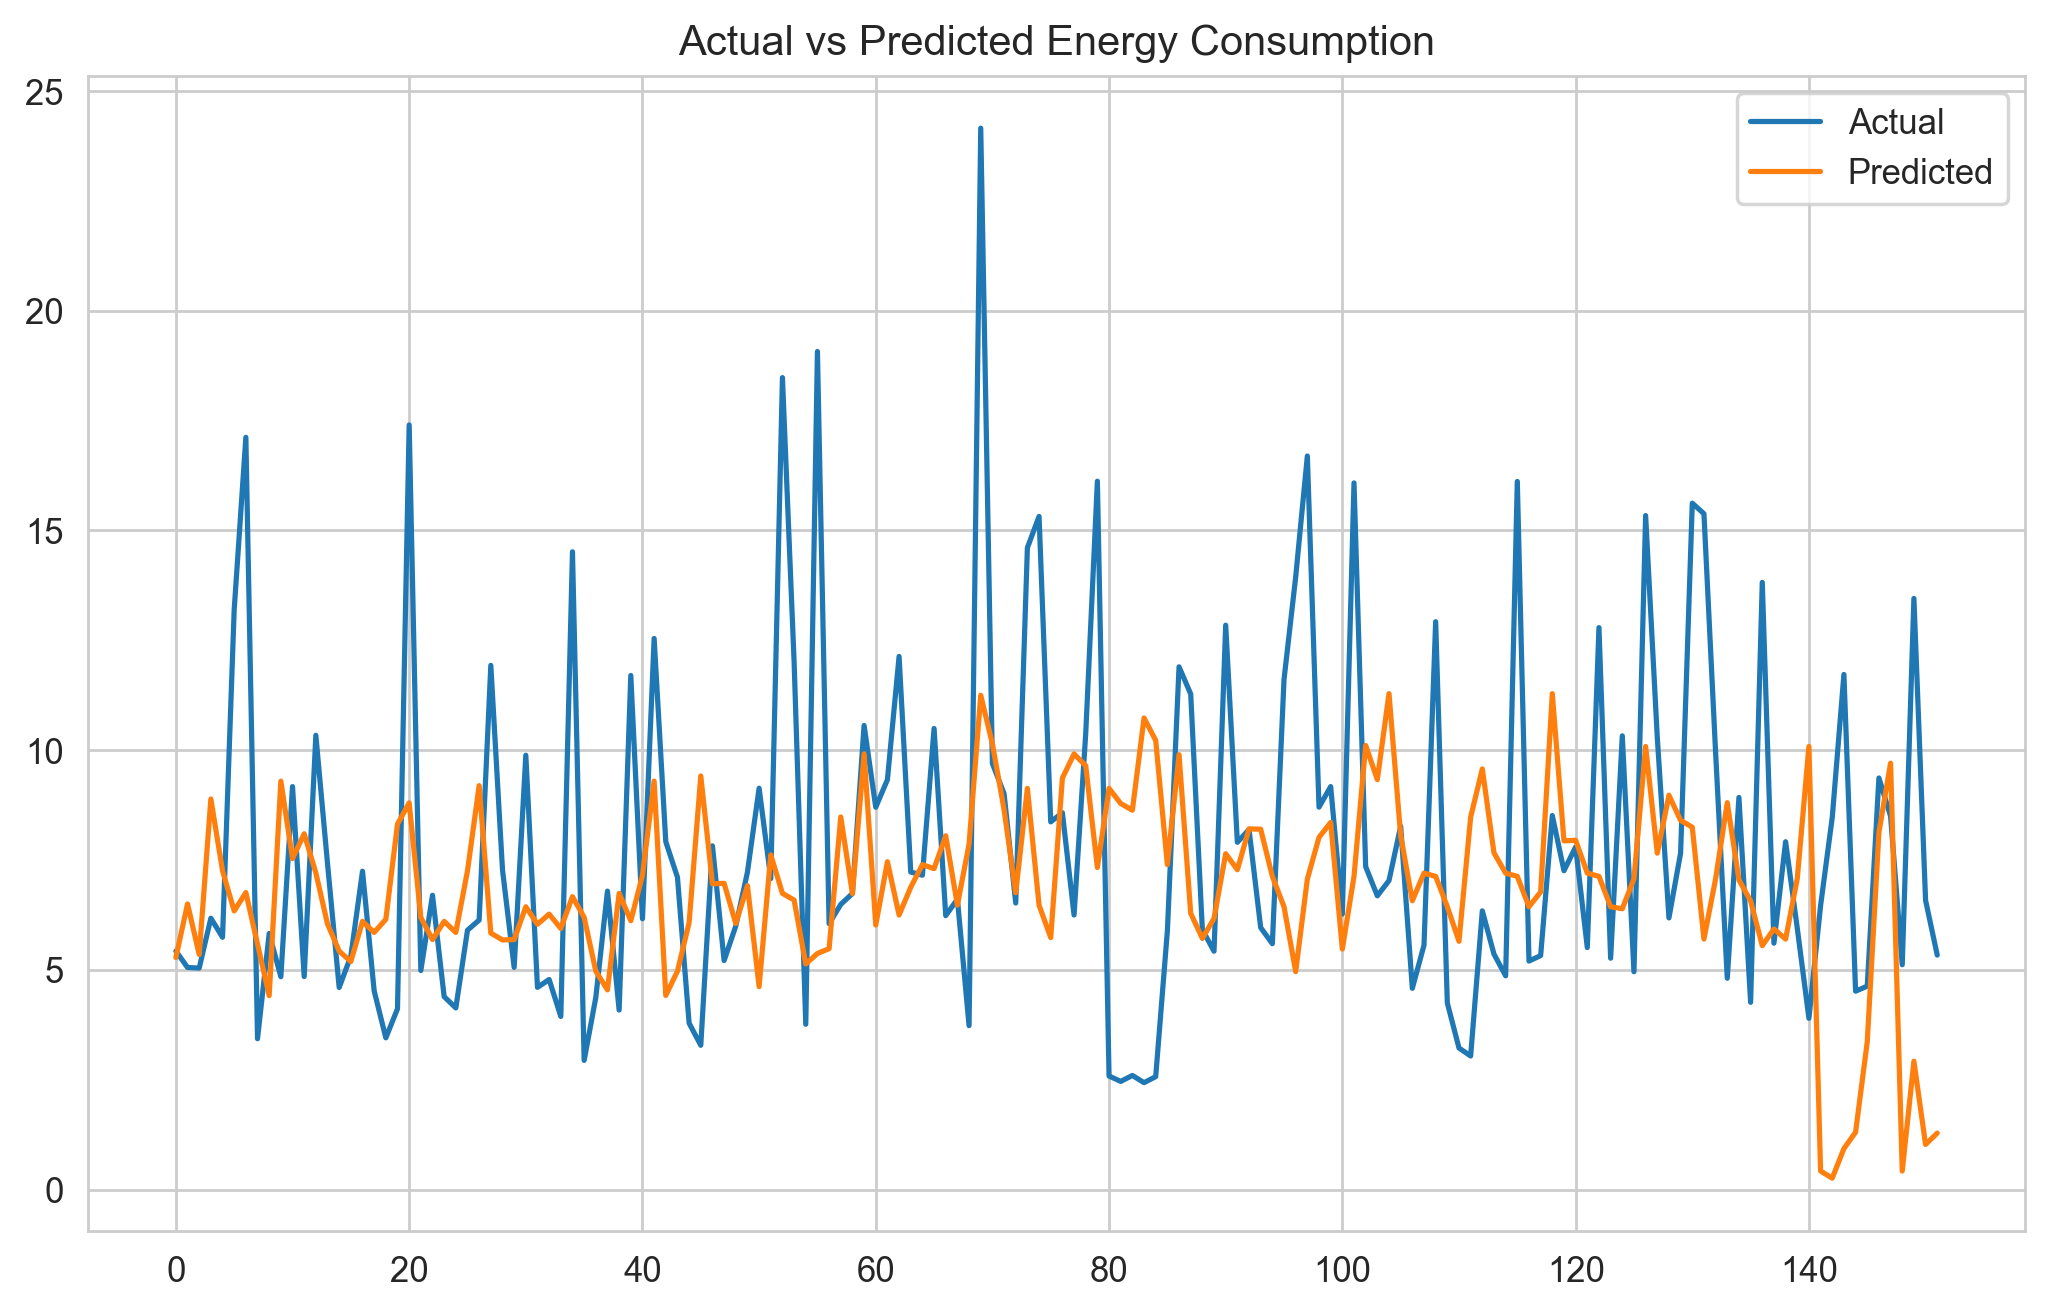

In [281]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6), dpi = 250)
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel()
plt.show()